# DTC-IS Use Case 1 - Greenland Hydropower Demonstrator Notebook

This notebook displays sample outputs from each stage of the workflow constructed for the DTC-IS use case on Greenland hydropower potential.

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Data provision



(In this pre-demonstrator, the data used has been processed locally. Later the data processed will be drawn from Enveo's fileshare after going through Earthwave's upload tools)

### Catchment selection

In the demonstrator case, a predefined catchment is chosen (Watson river basin). In the finished workflow, a range of preselected catchments will be available.

User-defined catchments are an option in future work.

<Axes: xlabel='metres easting', ylabel='metres northing'>

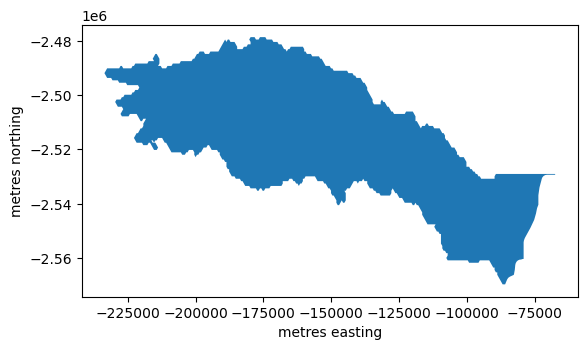

In [ ]:
basin_shapefile = "D:/DataDump/DTC-IS/SurfaceBasin.shp"
basin_shape = gpd.read_file(basin_shapefile)
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("metres easting")
ax.set_ylabel("metres northing")
gpd.GeoSeries(basin_shape.geometry[2]).plot(ax=ax)

### Year range selection

Years of available input data and years for prediction can be selected by the user.

(Years of input data are not expected to be user-selected in the final version but we run with partial data for convenience)

In [ ]:
input_start_year = 2014
input_end_year = 2021
prediction_start_year = 2030
prediction_end_year = 2040

### Input dataset 1: surface lake intensity

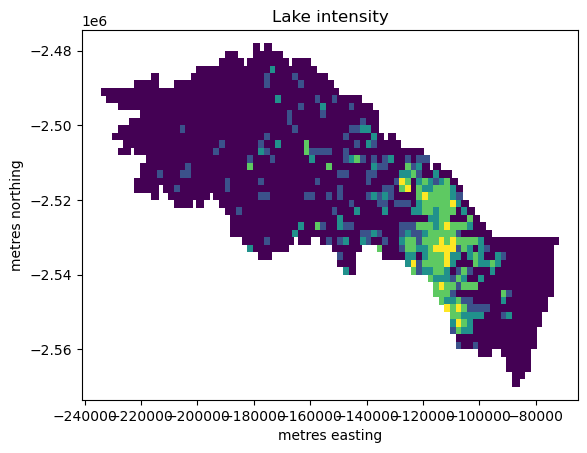

In [ ]:
locs = pd.read_csv("D:/DataDump/DTC-IS/lake_area_grids/2014_Aug_centroid.csv", header=None).to_numpy()
vals = pd.read_csv("D:/DataDump/DTC-IS/lake_area_grids/2014_Aug_logarea.csv", header=None).to_numpy()
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
#ax.set_xlim(xlim[0],xlim[1])
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("metres easting")
ax.set_ylabel("metres northing")
ax.set_title('Lake intensity')
ax.scatter(locs[:,0],locs[:,1],c=vals,marker='s',linewidths=0,s=30)

### Input dataset 2: RACMO surface runoff

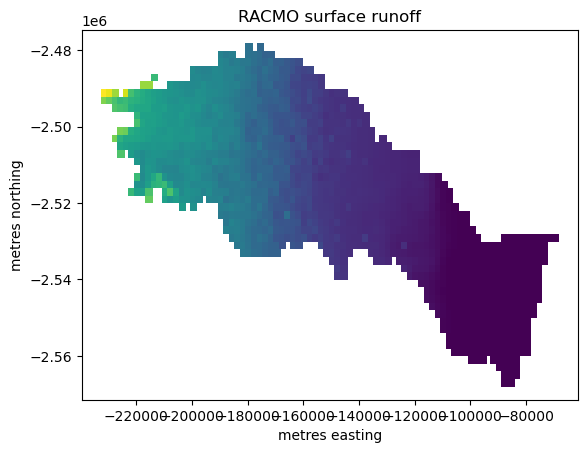

In [ ]:
locs = pd.read_csv("D:/DataDump/DTC-IS/runoff_grids/2014_Aug_centroid_clean_half.csv", header=None).to_numpy()
vals = pd.read_csv("D:/DataDump/DTC-IS/runoff_grids/2014_Aug_runoff_clean_half.csv", header=None).to_numpy()
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
#ax.set_xlim(xlim[0],xlim[1])
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("metres easting")
ax.set_ylabel("metres northing")
ax.set_title('RACMO surface runoff')
ax.scatter(locs[:,0],locs[:,1],c=vals,marker='s',linewidths=0,s=30)

### Input dataset 3: ERA5 reanalysis 2m air temperature

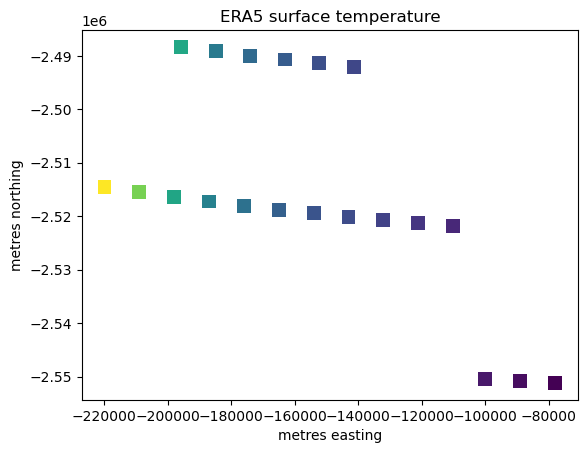

In [ ]:
locs = pd.read_csv("D:/DataDump/DTC-IS/temperature_grids/2014_Aug_centroid.csv", header=None).to_numpy()
vals = pd.read_csv("D:/DataDump/DTC-IS/temperature_grids/2014_Aug_temperature.csv", header=None).to_numpy()
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
#ax.set_xlim(xlim[0],xlim[1])
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("metres easting")
ax.set_ylabel("metres northing")
ax.set_title('ERA5 surface temperature')
ax.scatter(locs[:,0],locs[:,1],c=vals,marker='s',linewidths=0,s=100)

### Discharge data

Discharge data is available for the Watson basin from mid-2015 to end-2020 on a daily timescale

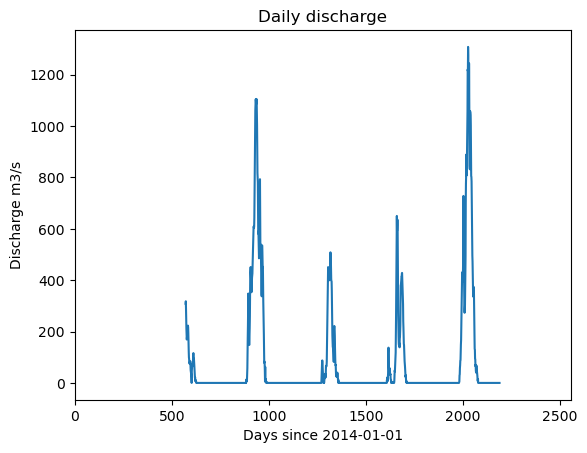

In [ ]:
discharge = pd.read_csv("D:/DataDump/DTC-IS/Basin7e_icesheet_runoff.csv", usecols=(1,)).to_numpy()
discharge[5:][np.where(discharge[5:] == 'Missing')] = 'NaN'
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
ax.set_xlim(0,365*7)
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("Days since 2014-01-01")
ax.set_ylabel("Discharge m3/s")
ax.set_title('Daily discharge')
ax.plot(np.arange(365,np.shape(discharge)[0]+360),discharge[5:].astype(float))

Discharge data is available for the Watson basin from 2006 to 2025 on a daily timescale

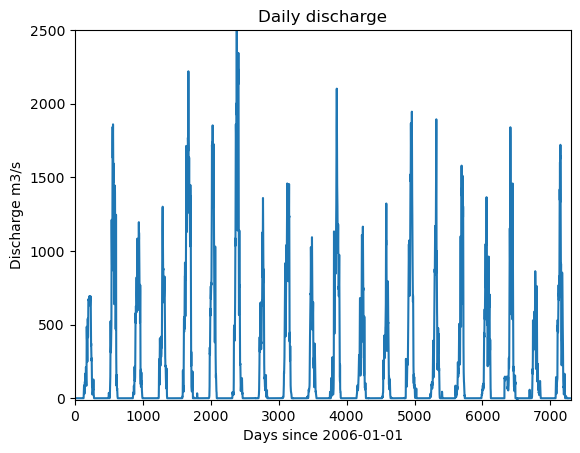

In [ ]:
discharge2 = pd.read_csv("D:/DataDump/DTC-IS/WatsonDischarge2006_2025.csv", usecols=(7,)).to_numpy()
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
ax.set_xlim(0,365*20)
ax.set_ylim(-10,2500)
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("Days since 2006-01-01")
ax.set_ylabel("Discharge m3/s")
ax.set_title('Daily discharge')
ax.plot(np.arange(11,np.shape(discharge2)[0]),discharge2[11:].astype(float))

In [ ]:
discharge2[10:]

array([[-416.62],
       [   0.  ],
       [   0.  ],
       ...,
       [   0.  ],
       [   0.  ],
       [   0.  ]], shape=(7278, 1))

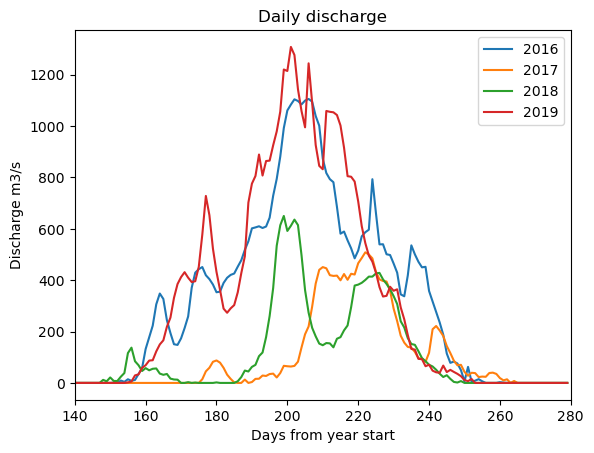

In [ ]:
discharge = pd.read_csv("D:/DataDump/DTC-IS/Basin7e_icesheet_runoff.csv", usecols=(1,)).to_numpy()
discharge[5:][np.where(discharge[5:] == 'Missing')] = 'NaN'
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
ax.set_xlim(140,280)
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("Days from year start")
ax.set_ylabel("Discharge m3/s")
ax.set_title('Daily discharge')
ax.plot(np.arange(140,280),discharge[145+365*1:285+365*1].astype(float), label='2016')
ax.plot(np.arange(140,280),discharge[145+365*2:285+365*2].astype(float), label='2017')
ax.plot(np.arange(140,280),discharge[145+365*3:285+365*3].astype(float), label='2018')
ax.plot(np.arange(140,280),discharge[145+365*4:285+365*4].astype(float), label='2019')
ax.legend()

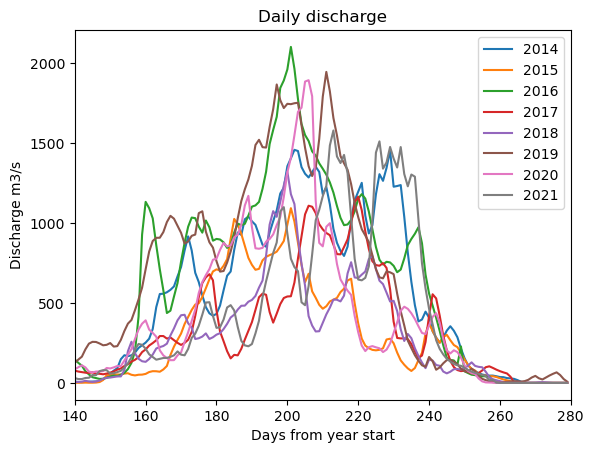

In [ ]:
discharge2 = pd.read_csv("D:/DataDump/DTC-IS/WatsonDischarge2006_2025.csv", usecols=(7,)).to_numpy()
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
ax.set_xlim(140,280)
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("Days from year start")
ax.set_ylabel("Discharge m3/s")
ax.set_title('Daily discharge')
ax.plot(np.arange(140,280),discharge2[145+365*8:285+365*8].astype(float), label='2014')
ax.plot(np.arange(140,280),discharge2[145+365*9:285+365*9].astype(float), label='2015')
ax.plot(np.arange(140,280),discharge2[145+365*10:285+365*10].astype(float), label='2016')
ax.plot(np.arange(140,280),discharge2[145+365*11:285+365*11].astype(float), label='2017')
ax.plot(np.arange(140,280),discharge2[145+365*12:285+365*12].astype(float), label='2018')
ax.plot(np.arange(140,280),discharge2[145+365*13:285+365*13].astype(float), label='2019')
ax.plot(np.arange(140,280),discharge2[145+365*14:285+365*14].astype(float), label='2020')
ax.plot(np.arange(140,280),discharge2[145+365*15:285+365*15].astype(float), label='2021')
ax.legend()

In [ ]:
discharge2

array([[-9999.],
       [-9999.],
       [-9999.],
       ...,
       [    0.],
       [    0.],
       [    0.]], shape=(7288, 1))

## Dataset covariance

Before making the predictive step, pairwise covariance between datasets is calculated. This informs us how well the variability in each of the input datasets can be explained by the others.

This is a potentially useful output in its own right.

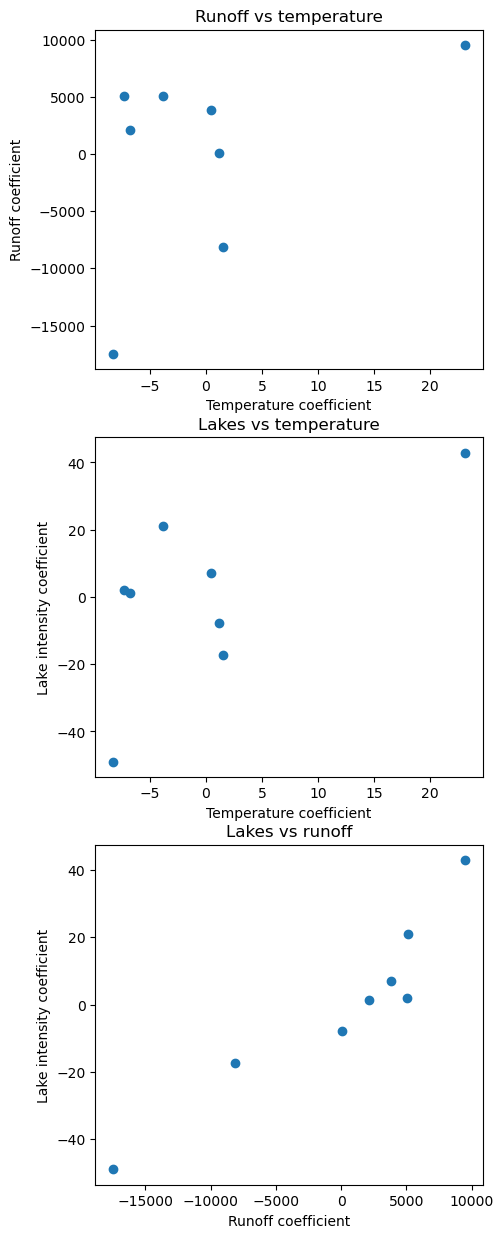

In [ ]:
lake_coeffs = pd.read_csv("D:/DataDump/DTC-IS/lake_coeffs.csv").to_numpy()
temp_coeffs = pd.read_csv("D:/DataDump/DTC-IS/temp_coeffs.csv").to_numpy()
runoff_coeffs = pd.read_csv("D:/DataDump/DTC-IS/runoff_coeffs.csv").to_numpy()
m,b = np.polyfit(lake_coeffs[:,0], runoff_coeffs[:,0], 1)
m,b
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(5,15)
ax[0].set_xlabel("Temperature coefficient")
ax[0].set_ylabel("Runoff coefficient")
ax[0].set_title('Runoff vs temperature')
ax[0].scatter(temp_coeffs[:,0],runoff_coeffs[:,0])
ax[1].set_xlabel("Temperature coefficient")
ax[1].set_ylabel("Lake intensity coefficient")
ax[1].set_title('Lakes vs temperature')
ax[1].scatter(temp_coeffs[:,0],lake_coeffs[:,0])
ax[2].set_xlabel("Runoff coefficient")
ax[2].set_ylabel("Lake intensity coefficient")
ax[2].set_title('Lakes vs runoff')
ax[2].scatter(runoff_coeffs[:,0],lake_coeffs[:,0])

-0.20718904925644965
0.7614641256081682
0.3379530392736342


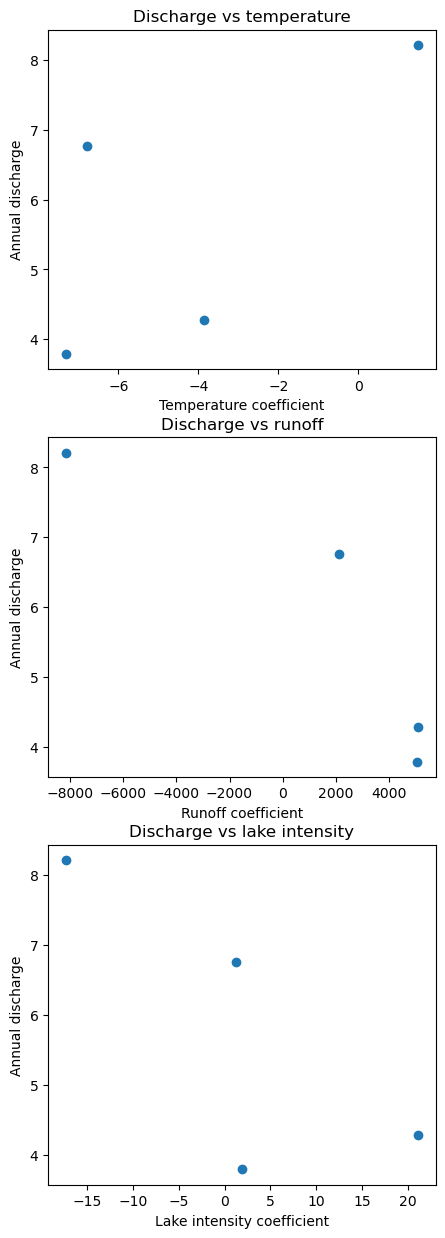

In [ ]:
# Covariance between input datasets and observed total discharge

# Watson discharge from 2014-2017 inclusive is only available as annual values
Watson_annual = [6.76,3.79,8.21,4.28]
m1,b1 = np.polyfit(temp_coeffs[:4,0],Watson_annual, 1)
aa = r2_score(b1 + m1*temp_coeffs[:4,0], Watson_annual)
print(aa)
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(5,15)
ax[0].set_xlabel("Temperature coefficient")
ax[0].set_ylabel("Annual discharge")
ax[0].set_title('Discharge vs temperature')
ax[0].scatter(temp_coeffs[:4,0],Watson_annual)

m2,b2 = np.polyfit(runoff_coeffs[:4,0],Watson_annual, 1)
aa = r2_score(b2 + m2*runoff_coeffs[:4,0], Watson_annual)
print(aa)
ax[1].set_xlabel("Runoff coefficient")
ax[1].set_ylabel("Annual discharge")
ax[1].set_title('Discharge vs runoff')
ax[1].scatter(runoff_coeffs[:4,0],Watson_annual)

m3,b3 = np.polyfit(lake_coeffs[:4,0],Watson_annual, 1)
aa = r2_score(b3 + m3*lake_coeffs[:4,0], Watson_annual)
print(aa)
ax[2].set_xlabel("Lake intensity coefficient")
ax[2].set_ylabel("Annual discharge")
ax[2].set_title('Discharge vs lake intensity')
ax[2].scatter(lake_coeffs[:4,0],Watson_annual)

## Predicting net runoff

Various statistics on predicted net runoff for the selected prediction year range are provided:

1. Total annual runoff
2. Monthly runoff pattern
3. Extreme values expected at the 10 year and 50 year range

### Total annual runoff

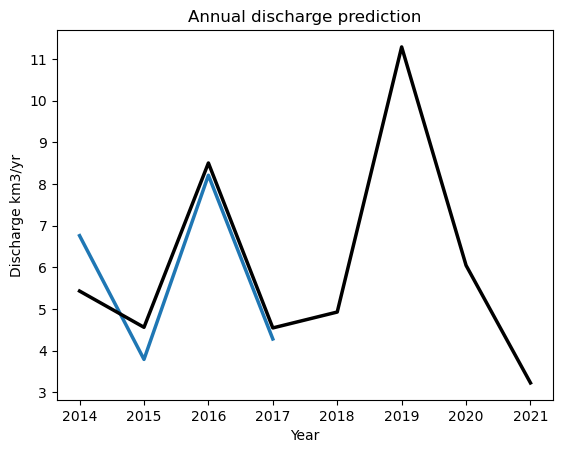

In [ ]:
Watson_annual = [6.76,3.79,8.21,4.28]
m1,b1 = np.polyfit(runoff_coeffs[:4,0],Watson_annual, 1)
aa = r2_score(b + m*runoff_coeffs[:4,0], Watson_annual)
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Year")
ax.set_ylabel("Discharge km3/yr")
ax.set_title('Annual discharge prediction')
ax.plot(np.arange(2014,2018),Watson_annual,linewidth=2.5)
ax.plot(np.arange(2014,2022),b1+ m1*runoff_coeffs[:,0],color='k',linewidth=2.5)


### Monthly runoff

In [ ]:
month_values = np.zeros(5*8)
month_values = month_values.reshape(5,8)
# We predict for May to September inclusive
month_boundaries = [120,151,181,212,242,273]
for i in np.arange(5):
    for j in np.arange(2,6):
        month_values[i,j] = sum(discharge[month_boundaries[i]+((j-1)*365):month_boundaries[i+1]+((j-1)*365)].astype(float))[0]
monthly_m = np.zeros(4)
monthly_b = np.zeros(4)
for i in np.arange(1,5):
    monthly_m[i-1],monthly_b[i-1] = np.polyfit(runoff_coeffs[2:6,0],month_values[i,2:6], 1)
    aa = r2_score(monthly_b[i-1] + monthly_m[i-1]*runoff_coeffs[2:6,0],month_values[i,2:6])
    print(aa)

0.8709118477772362
0.9162464571946889
0.7612334261962518
-1039.4862244966337


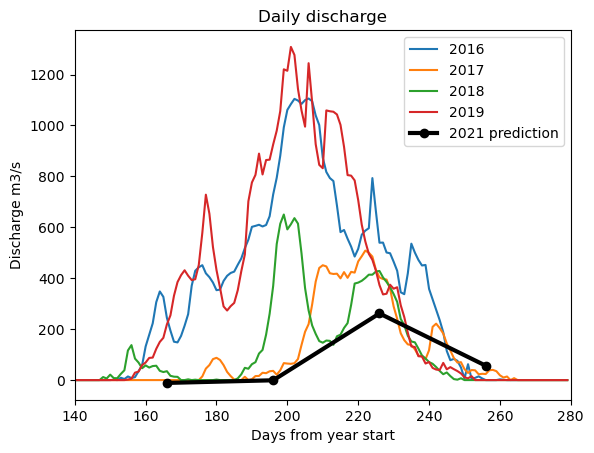

In [ ]:
year_prediction = 2021

fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
ax.set_xlim(140,280)
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("Days from year start")
ax.set_ylabel("Discharge m3/s")
ax.set_title('Daily discharge')
ax.plot(np.arange(140,280),discharge[145+365*1:285+365*1].astype(float), label='2016')
ax.plot(np.arange(140,280),discharge[145+365*2:285+365*2].astype(float), label='2017')
ax.plot(np.arange(140,280),discharge[145+365*3:285+365*3].astype(float), label='2018')
ax.plot(np.arange(140,280),discharge[145+365*4:285+365*4].astype(float), label='2019')
ax.plot(np.arange(166,280,30),(monthly_b + monthly_m*runoff_coeffs[year_prediction-2014,0])/30.5,linewidth=3,color='k',marker='o', label=str(year_prediction) + ' prediction')
ax.legend()

### Weekly runoff

In [ ]:
week_values = np.zeros(16*8)
week_values = week_values.reshape(16,8)
# We predict for May to September inclusive
week_boundaries = np.arange(143,260,7)
for i in np.arange(16):
    for j in np.arange(2,6):
        week_values[i,j] = sum(discharge[week_boundaries[i]+((j-1)*365):week_boundaries[i+1]+((j-1)*365)].astype(float))[0]
weekly_m = np.zeros(15)
weekly_b = np.zeros(15)
for i in np.arange(1,16):
    weekly_m[i-1],weekly_b[i-1] = np.polyfit(runoff_coeffs[2:6,0],week_values[i,2:6], 1)
    aa = r2_score(weekly_b[i-1] + weekly_m[i-1]*runoff_coeffs[2:6,0],week_values[i,2:6])
    print(aa)

-2.0560530949581723
-5.336557089605315
-0.6137045658410085
0.9993306067841746
0.9558959692304978
0.6629920434948027
0.955618361521012
0.8334966742481308
0.8493373557837037
0.8097157100677062
0.8639617007738791
-16.531641815336798
-2.7661724282721156
-54.50085308506104
-47.969306155665926


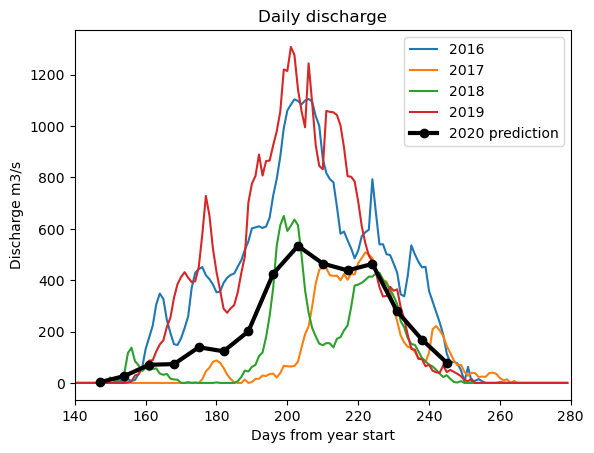

In [ ]:
year_prediction = 2020

fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(5,3)
ax.set_xlim(140,280)
#ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel("Days from year start")
ax.set_ylabel("Discharge m3/s")
ax.set_title('Daily discharge')
ax.plot(np.arange(140,280),discharge[145+365*1:285+365*1].astype(float), label='2016')
ax.plot(np.arange(140,280),discharge[145+365*2:285+365*2].astype(float), label='2017')
ax.plot(np.arange(140,280),discharge[145+365*3:285+365*3].astype(float), label='2018')
ax.plot(np.arange(140,280),discharge[145+365*4:285+365*4].astype(float), label='2019')
ax.plot(np.arange(147,248,7),(weekly_b + weekly_m*runoff_coeffs[year_prediction-2014,0])/7,linewidth=3,color='k',marker='o', label=str(year_prediction) + ' prediction')
ax.legend()

In [ ]:
print('Total annual discharge (from weekly) 2016-2019')
for i in np.arange(4):
    print(sum(weekly_b + weekly_m*runoff_coeffs[i+2,0]))

Total annual discharge (from weekly) 2016-2019
37751.29184011785
16264.930895600013
18335.334104233945
52871.80539804123


In [ ]:
print('Total annual discharge (from monthly) 2016-2019')
for i in np.arange(4):
    print(sum(monthly_b + monthly_m*runoff_coeffs[i+2,0]))

Total annual discharge (from monthly) 2016-2019
37851.196118258624
16469.037893465244
18529.4002373002
52898.37949986996


In [ ]:
print(sum(monthly_b + monthly_m*runoff_coeffs[7,0]))
print(sum(weekly_b + weekly_m*runoff_coeffs[7,0]))

9339.057642990803
9100.203762894595


### Extreme values

Pending, this is a subcomponent under active development